# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/rajagrawal7089/furniture-sales-data
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [29]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from scipy import stats

# Clustering dan Evaluasi
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Pra-pemrosesan
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import IsolationForest

# Reduksi Dimensi
from sklearn.decomposition import PCA

# Pengaturan visualisasi
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [30]:
# Upload dataset ke Colab
from google.colab import files
uploaded = files.upload()

Saving Dataset_Inisiasi.csv to Dataset_Inisiasi (1).csv


In [31]:
# Membaca dataset
df = pd.read_csv('Dataset_Inisiasi.csv')

In [32]:
df.head(10)

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
5,120.197534,65.352083,6,45.629432,185,20.659352,8,Table,Plastic,Brown,Urban,Fall,Retail,BrandB,9136.301617
6,76.137625,64.076267,20,15.841521,165,29.359622,9,Sofa,Glass,Green,Suburban,Summer,Online,BrandA,4128.412805
7,439.779266,297.141226,27,32.434007,10,21.798133,4,Sofa,Wood,White,Urban,Winter,Retail,BrandC,9516.966398
8,320.501755,268.832879,43,16.121246,11,27.861881,4,Bed,Fabric,Brown,Suburban,Spring,Retail,BrandD,8882.539029
9,368.632660,316.005217,37,14.276392,169,24.129141,2,Sofa,Fabric,Black,Urban,Spring,Retail,BrandD,8946.637741


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. Memahami Struktur Data

In [33]:
# Memahami Strukstur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [34]:
# Ukuran data
print("Ukuran dataset (baris, kolom):", df.shape)

Ukuran dataset (baris, kolom): (2500, 15)


In [35]:
# Tipe data tiap kolom
print("\nTipe data per kolom:\n", df.dtypes)


Tipe data per kolom:
 price                  float64
cost                   float64
sales                    int64
profit_margin          float64
inventory                int64
discount_percentage    float64
delivery_days            int64
category                object
material                object
color                   object
location                object
season                  object
store_type              object
brand                   object
revenue                float64
dtype: object


In [36]:
# Cek nama kolom
print("\nNama kolom:\n", df.columns.tolist())


Nama kolom:
 ['price', 'cost', 'sales', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days', 'category', 'material', 'color', 'location', 'season', 'store_type', 'brand', 'revenue']


2. Menangani Data yang Hilang

In [37]:
# Menangani data yang hilang
print("Jumlah data yang hilang per kolom:")
df.isnull().sum()

Jumlah data yang hilang per kolom:


,0
price,0
cost,0
sales,0
profit_margin,0
inventory,0
discount_percentage,0
delivery_days,0
category,0
material,0
color,0


In [38]:
# Mengecek Jumlah Baris Duplikat
print("\nDuplicate:")
print(df.duplicated().sum())


Duplicate:
0


3. Analisis Distribusi dan Korelasi

In [39]:
# Statistik deskriptif
print(df.describe())

             price         cost        sales  profit_margin    inventory  \
count  2500.000000  2500.000000  2500.000000    2500.000000  2500.000000   
mean    274.495219   191.930107    24.924000      30.208571    97.715600   
std     130.898452    98.590751    14.050067      11.536804    57.616228   
min      50.704297    26.505895     1.000000      10.017692     0.000000   
25%     159.104890   106.399135    13.000000      20.230697    50.000000   
50%     277.641809   189.336329    25.000000      30.297911    94.000000   
75%     387.378046   263.188280    37.000000      40.134205   147.000000   
max     499.872953   447.022911    49.000000      49.999535   199.000000   

       discount_percentage  delivery_days       revenue  
count          2500.000000     2500.00000   2500.000000  
mean             14.947616        4.89400   5926.853657  
std               8.621547        2.55902   6902.737604  
min               0.005556        1.00000 -14214.565505  
25%               7.76021

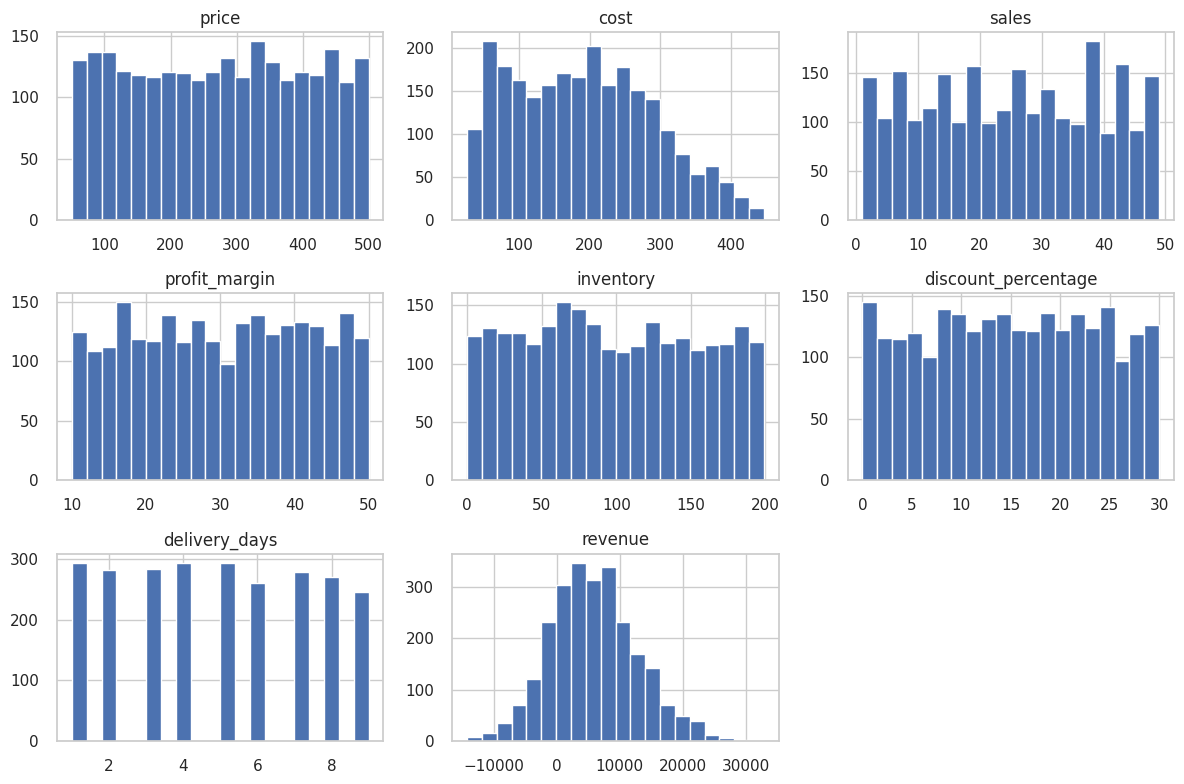

In [40]:
# Histogram untuk distribusi variabel numerik
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

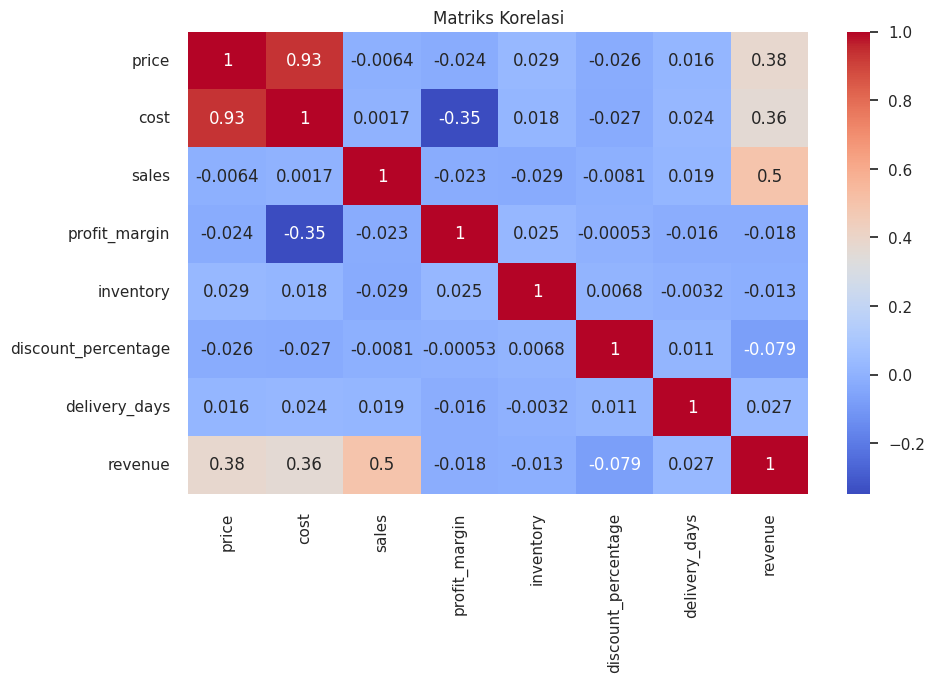

In [41]:
# Korelasi hanya untuk kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Matriks Korelasi")
    plt.show()

4. Visualisasi Data

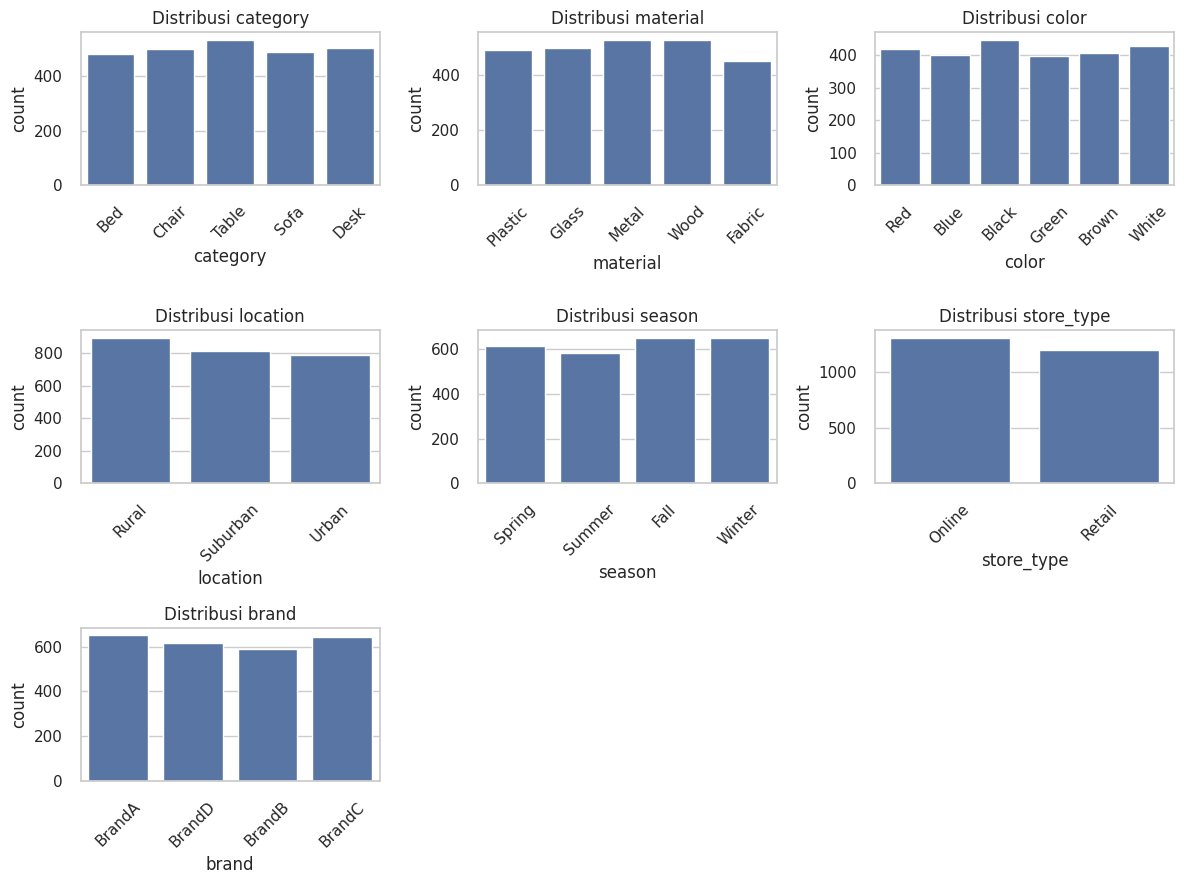

In [42]:
# Ambil kolom kategorikal
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Jumlah kolom per baris
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Ukuran figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

# Plot tiap kategori
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hapus sumbu kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


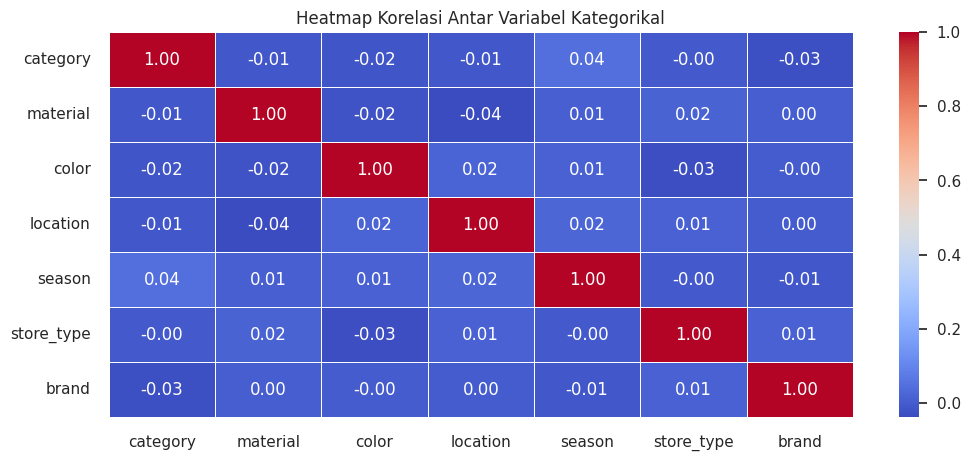

In [43]:
# Pilih kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Lakukan Label Encoding hanya pada kolom-kolom kategorikal
df_encoded = df[categorical_features].apply(lambda col: LabelEncoder().fit_transform(col))

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Kategorikal")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. Menghapus atau Menangani Data Kosong (Missing Values)

In [44]:
# Cek data kosong
print("Jumlah data yang hilang:")
print(df.isnull().sum())

Jumlah data yang hilang:
price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64


2. Menghapus Data Duplikat

In [45]:
# Memeriksa apakah ada duplikat sebelum menghapusnya
duplicates_before = df.duplicated().sum()

df.drop_duplicates(inplace=True)

if duplicates_before > 0:
    df.drop_duplicates(inplace=True)
    print(f"Ada {duplicates_before} duplikat yang dihapus.")
else:
    print("Tidak ada duplikat yang ditemukan.")

Tidak ada duplikat yang ditemukan.


3. Normalisasi atau Standarisasi Fitur

In [46]:
# Daftar kolom numerik dan kategorikal
numeric_features = ['price', 'cost', 'sales', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days', 'revenue']
categorical_features = ['category', 'material', 'color', 'location', 'season', 'store_type', 'brand']

# Transformasi untuk kolom numerik: Standarisasi
numeric_transformer = StandardScaler()

# Transformasi untuk kolom kategorikal: One-Hot Encoding
categorical_transformer = OneHotEncoder()

# Inisialisasi ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Standarisasi untuk kolom numerik
        ('cat', categorical_transformer, categorical_features)  # One-Hot Encoding untuk kolom kategorikal
    ]
)

4. Deteksi dan Penanganan Outlier

In [47]:
z_scores = stats.zscore(df[numeric_df.columns])
df = df[(np.abs(z_scores) < 3).all(axis=1)]

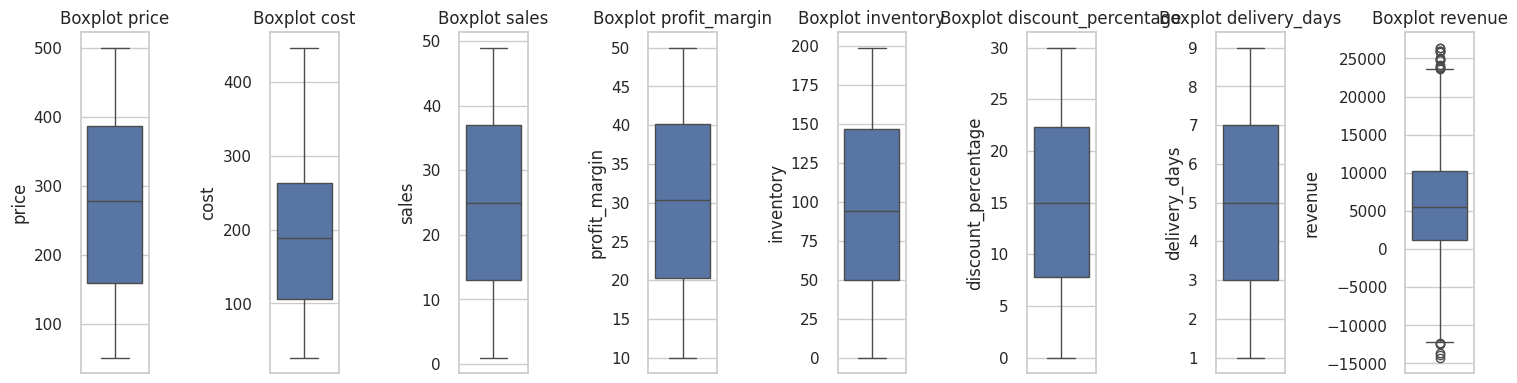

In [48]:
plt.figure(figsize=(15, 4))
n_cols = 3  # Misalnya, tampilkan 3 plot per baris
n_rows = (len(numeric_features) // n_cols) + int(len(numeric_features) % n_cols > 0)
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

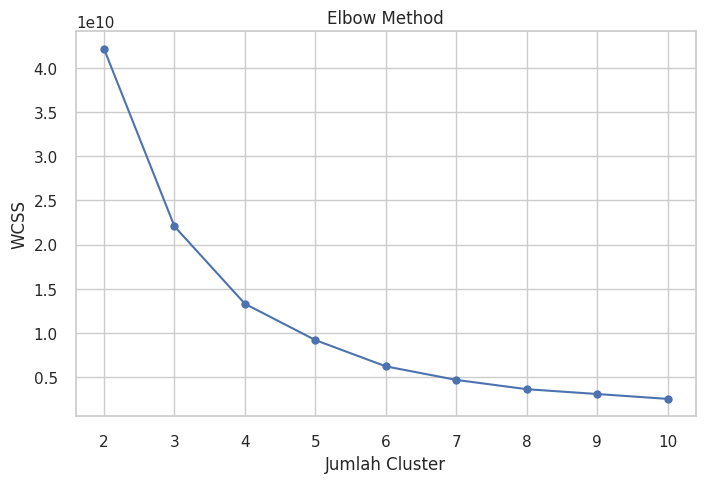

In [49]:
X = df.select_dtypes(include=['float64', 'int64'])

# Elbow Method untuk menentukan jumlah cluster optimal
wcss = []
for i in range(2, 11):  # Uji untuk jumlah cluster antara 2 hingga 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [50]:
# Menggunakan KMeans, tentukan jumlah cluster
kmeans = KMeans(n_clusters=4, random_state=42)

# Tentukan fitur yang digunakan untuk clustering
X = df[numeric_df.columns]

# Fitting model
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

print(df['Cluster'].value_counts())  # jumlah data di setiap cluster
df.head()

Cluster
3    896
2    794
1    446
0    361
Name: count, dtype: int64


,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue,Cluster
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238,3
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258,1
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219,0
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703,2
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733,1


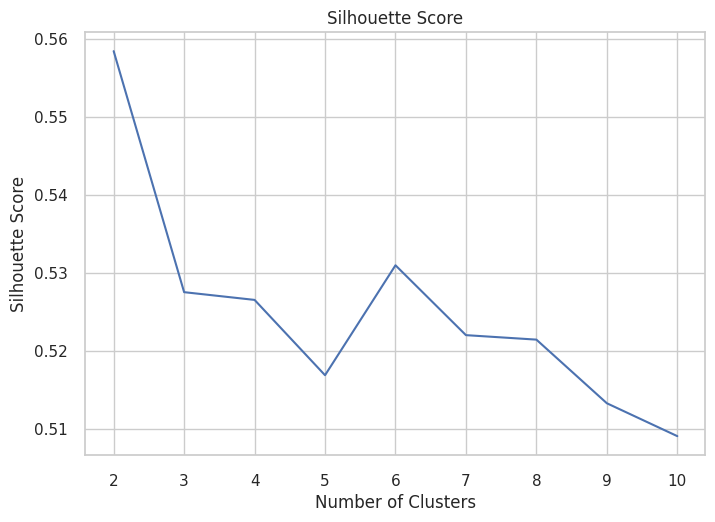

In [51]:
# Mengevaluasi kualitas cluster
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [52]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans

In [53]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

# Hitung Silhouette Score untuk model yang telah difit
sil_score = silhouette_score(X, kmeans.labels_)

print(f"Silhouette Score : {sil_score}")

Silhouette Score : 0.5265453685035844


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

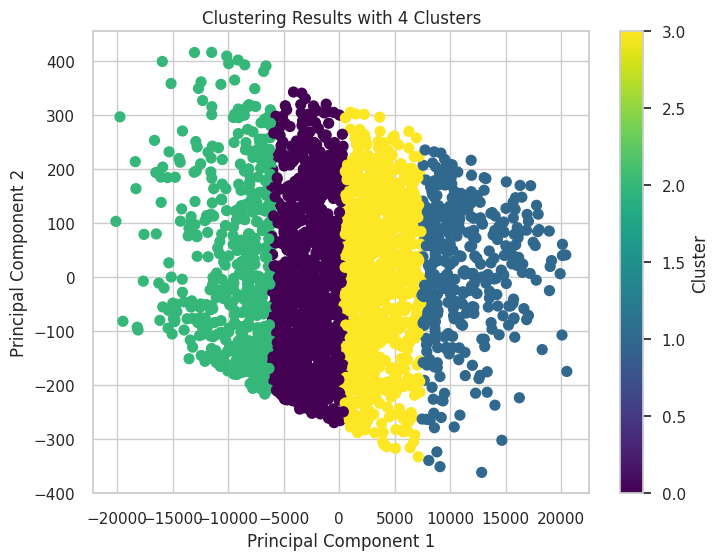

In [54]:
X_for_pca = X.drop('Cluster', axis=1) if 'Cluster' in X.columns else X

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_for_pca)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Clustering Results with 4 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [55]:
df = df.copy()
df.loc[:, 'Cluster'] = y_kmeans

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [56]:
# 1. Hitung rata-rata fitur numerikal per cluster
mean_df = df.groupby('Cluster')[numeric_features].mean()

# 2. Hitung modus fitur kategorikal per cluster
mode_df = df.groupby('Cluster')[categorical_features].agg(lambda x: x.mode().iloc[0])

# 3. Gabungkan hasil rata-rata dan modus
summary_df = pd.concat([mean_df, mode_df], axis=1)

# 4. Encode semua fitur kategorikal menjadi numerik
df_encoded = df.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Simpan encoder untuk inverse_transform

# Tampilkan ringkasan karakteristik setiap cluster
print("Ringkasan Karakteristik Tiap Cluster:")
print(summary_df)

Ringkasan Karakteristik Tiap Cluster:
              price        cost      sales  profit_margin  inventory  \
Cluster                                                                
0        240.765162  167.710338  21.890258      30.481306  99.219485   
1        370.638898  261.669416  37.723464      29.545380  97.393855   
2        224.867402  156.536969  15.614224      30.565413  97.926724   
3        297.951021  208.357186  27.979540      29.990798  96.120205   

         discount_percentage  delivery_days       revenue category material  \
Cluster                                                                       
0                  15.378917       4.829787   3154.171857     Desk    Metal   
1                  12.671872       5.013966  17301.559558    Table    Metal   
2                  15.173495       4.806034  -3521.896540    Chair    Metal   
3                  15.374783       4.962916   9397.399310    Table    Glass   

         color location  season store_type   brand  
C

In [57]:
print(df_encoded.dtypes)


price                  float64
cost                   float64
sales                    int64
profit_margin          float64
inventory                int64
discount_percentage    float64
delivery_days            int64
category                 int64
material                 int64
color                    int64
location                 int64
season                   int64
store_type               int64
brand                    int64
revenue                float64
Cluster                  int32
dtype: object


In [58]:
print("Ringkasan Data yang Sudah Dienkode:")
print(df_encoded.head())

Ringkasan Data yang Sudah Dienkode:
        price        cost  sales  profit_margin  inventory  \
0  218.543053  181.610932     40      16.899243        105   
1  477.821438  385.033827      7      19.418888        192   
2  379.397274  276.736765     32      27.058842         59   
3  319.396318  281.841334     48      11.758114         45   
4  120.208388   69.743681     19      41.981019         35   

   discount_percentage  delivery_days  category  material  color  location  \
0            27.796433              9         0         3      4         0   
1            26.943715              6         1         1      1         0   
2            21.948130              2         4         2      0         1   
3            11.009944              2         4         1      3         0   
4             3.183763              9         1         1      2         0   

   season  store_type  brand       revenue  Cluster  
0       1           0      0   3949.165238        0  
1       2     

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Cluster Count:
 Cluster
0    893
3    782
2    464
1    358
Name: count, dtype: int64


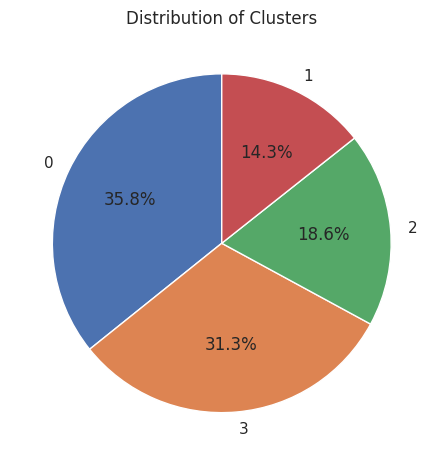

In [59]:
# Menghitung jumlah data di setiap cluster
cluster_count = df['Cluster'].value_counts()

# Menampilkan jumlah data per cluster
print("Cluster Count:\n", cluster_count)

# Visualisasi
plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.show()

**Cluster 0 (35.8% dari total data):**
- Karakteristik utama: Memiliki nilai rata-rata negatif untuk price, cost, dan sales, namun tetap mencatat profit_margin yang positif, meskipun kecil. Revenue juga relatif rendah.
- Kesimpulan: Cluster ini kemungkinan mewakili produk dengan harga, biaya, dan penjualan yang lebih rendah, namun tetap memberikan margin keuntungan yang cukup stabil. Mungkin ini adalah produk-produk dengan efisiensi biaya yang baik.

**Cluster 1 (14.3% dari total data):**
- Karakteristik utama: Memiliki rata-rata sales dan revenue tertinggi di antara semua cluster, meskipun dengan margin keuntungan (profit_margin) yang negatif. Juga memiliki diskon terendah.
- Kesimpulan: Cluster ini mencerminkan produk yang sangat laris dan menghasilkan revenue besar, tetapi dengan margin keuntungan negatif—kemungkinan karena harga dan biaya tinggi. Ini bisa jadi produk flagship atau promosi besar-besaran.

**Cluster 2 (18.6% dari total data):**
- Karakteristik utama: Memiliki sales dan revenue yang paling rendah, meskipun margin keuntungannya positif dan lebih tinggi dari cluster lain.

- Kesimpulan: Produk di cluster ini tampaknya dijual dalam volume kecil, namun sangat efisien secara profit. Mungkin termasuk produk premium atau dengan target pasar spesifik.

**Cluster 3 (31.3% dari total data):**
- Karakteristik utama: Kinerja rata-rata pada sebagian besar fitur. Sales dan revenue tergolong sedang, margin keuntungan sedikit negatif.
- Kesimpulan: Produk di cluster ini mungkin adalah kategori umum atau reguler, yang tidak terlalu menonjol dalam penjualan maupun profitabilitas. Bisa jadi mewakili mayoritas produk standar di toko.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- Rata-rata Harga (price): 240.77
- Rata-rata Biaya (cost): 167.71
- Rata-rata Penjualan (sales): 21.89
- Profit Margin: 30.48
- Inventory: 99.22
- Diskon: 15.38%
- Hari Pengiriman: 4.83
- Pendapatan (revenue): 3,154

**Analisis:**

Cluster ini mencakup produk dengan harga menengah, margin laba cukup tinggi, dan tingkat persediaan tinggi. Produk ini cenderung stabil dan memiliki performa penjualan yang wajar, dengan pengiriman cepat. Cocok untuk pasar umum dengan sedikit potongan harga dan loyalitas terhadap brand tertentu.

----------------------------------------------
## Cluster 1:
- Rata-rata Harga (price): 370.64
- Rata-rata Biaya (cost): 261.67
- Rata-rata Penjualan (sales): 37.72
- Profit Margin: 29.55
- Inventory: 97.39
- Diskon: 12.67%
- Hari Pengiriman: 5.01
- Pendapatan (revenue): 17,301.56

**Analisis:**

Cluster ini menunjukkan produk premium dengan harga dan penjualan tinggi. Meskipun diskonnya kecil, revenue sangat tinggi. Produk di cluster ini tampaknya merupakan produk unggulan yang laris, cocok dipasarkan ke segmen pelanggan kelas atas dengan brand kuat.

----------------------------------------------
## Cluster 2:
- Rata-rata Harga (price): 224.87
- Rata-rata Biaya (cost): 156.54
- Rata-rata Penjualan (sales): 15.61
- Profit Margin: 30.57
- Inventory: 97.93
- Diskon: 15.17%
- Hari Pengiriman: 4.81
- Pendapatan (revenue): -3,521.90

**Analisis:**

Cluster ini berisi produk dengan harga rendah, penjualan rendah, dan revenue negatif—mungkin mengalami kerugian. Meskipun margin labanya tinggi, volume penjualannya sangat kecil. Kemungkinan ini adalah produk yang kurang diminati atau memiliki masalah di pasar tertentu.

----------------------------------------------

## Cluster 3:
- Rata-rata Harga (price): 297.95
- Rata-rata Biaya (cost): 208.36
- Rata-rata Penjualan (sales): 27.98
- Profit Margin: 29.99
- Inventory: 96.12
- Diskon: 15.37%
- Hari Pengiriman: 4.96
- Pendapatan (revenue): 9,397.40

**Analisis:**

Produk dalam cluster ini berada pada level menengah-atas baik dari sisi harga maupun penjualan. Revenue yang dihasilkan cukup tinggi dengan tingkat diskon yang sedang. Produk ini bisa dianggap sebagai produk stabil dengan performa penjualan baik dan efisiensi distribusi cukup baik.

----------------------------------------------


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [60]:
# Menyimpan hasil clustering ke dalam file CSV
df_encoded.to_csv('Dataset_Clustering.csv', index=False)

# Jika ingin mendownloadnya langsung ke local machine (Google Colab)
from google.colab import files
files.download('Dataset_Clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>